<a href="https://colab.research.google.com/github/BharatSingla12/Bike_Sharing_Demand_Prediction_ML_Project/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Importing the all the libraies and mounting the drive

In [1]:
# Import all the libraries 
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lets take a glimpse of the overall data and each column individually

In [3]:
# Load the playstore data 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Supervised ML - Regression Project/SeoulBikeData.csv", encoding= 'unicode_escape')

# Lets view the overall data
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Get the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# Convert the date in datetime format 
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [6]:
# Lets view again 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Lets find the number of NaN values in each column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Get the description of all the numeric and datetime columns
df.describe(datetime_is_numeric=True).T

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


In [ ]:
# Get list of all the categorical columns
catagorical_columns = df.select_dtypes(include=[object]).columns

print("The categorical columns are:")
for i in catagorical_columns:
    print('-> ' + i)   

The categorical columns are:
-> Seasons
-> Holiday
-> Functioning Day


In [ ]:
# Get list of all the numerical columns
numerical_columns  = df.select_dtypes(include=np.number).columns

print("The numerical columns are:")
for i in numerical_columns:
    print('-> ' + i)

The numerical columns are:
-> Rented Bike Count
-> Hour
-> Temperature(°C)
-> Humidity(%)
-> Wind speed (m/s)
-> Visibility (10m)
-> Dew point temperature(°C)
-> Solar Radiation (MJ/m2)
-> Rainfall(mm)
-> Snowfall (cm)


In [ ]:
# Get the list of unique values of categorical columns with their frequencies
print('The unique values of categorical columns with their frequencies are: \n')
for i in catagorical_columns:
    print(df[i].value_counts())
    print("="*35 + "||")

The unique values of categorical columns with their frequencies are: 

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
===================================||
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
===================================||
Yes    8465
No      295
Name: Functioning Day, dtype: int64
===================================||


In [ ]:
# Check for the duplicate columns
print(f"The duplicate columns are {df.duplicated().sum()}.")

The duplicate columns are 0.


**Conclusion**: 
1. The data is properly formated.
2. There is no null null values.
3. There is no duplicate values.
4. There are 3 categorical columns and 10 numerical columns.

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df["Date"]

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [ ]:
8760/24

365.0

In [ ]:
# Create a variable month to denote the transaction month
# df['Month']= 
A = df['Date'].apply(lambda x: x.strftime("%Y-%d-%m"))

In [ ]:
A

0       2017-01-12
1       2017-01-12
2       2017-01-12
3       2017-01-12
4       2017-01-12
           ...    
8755    2018-30-11
8756    2018-30-11
8757    2018-30-11
8758    2018-30-11
8759    2018-30-11
Name: Date, Length: 8760, dtype: object

In [ ]:
df[df['Functioning Day']=='No']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


## EDA

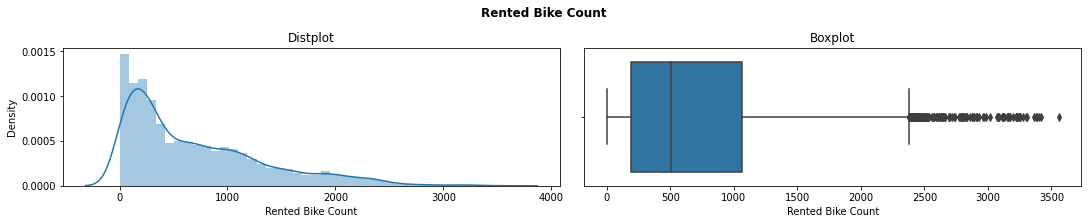

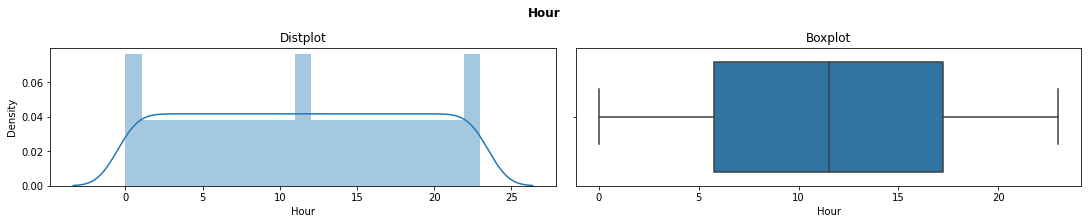

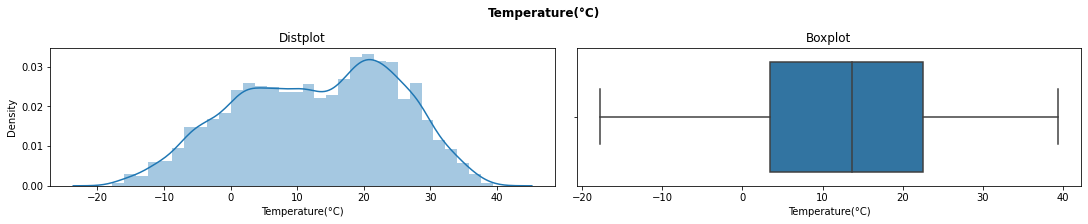

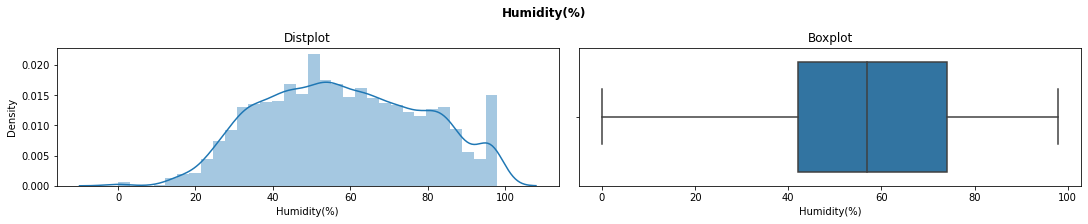

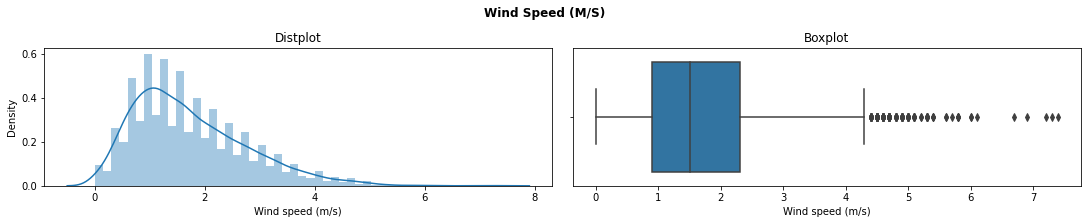

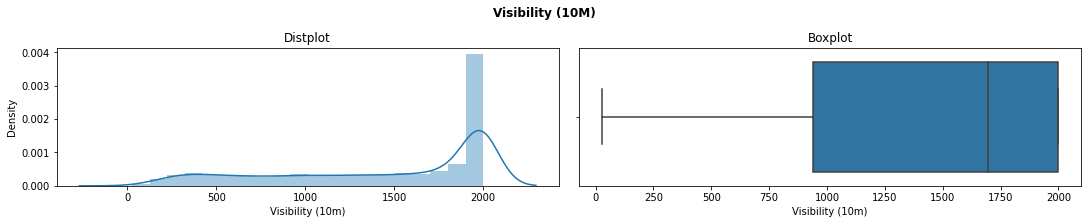

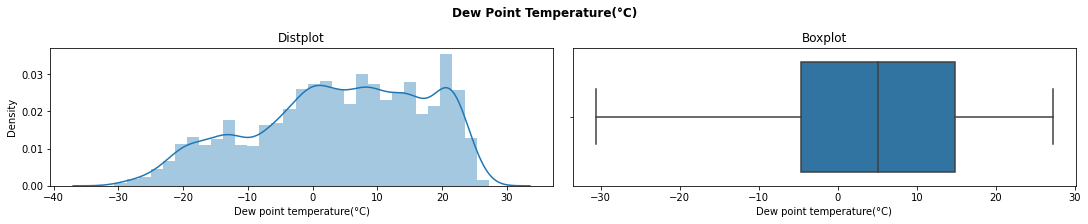

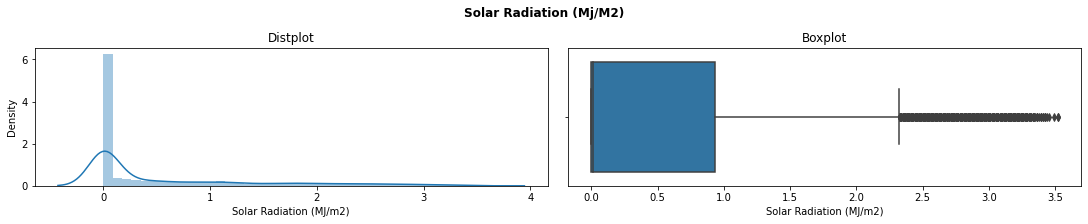

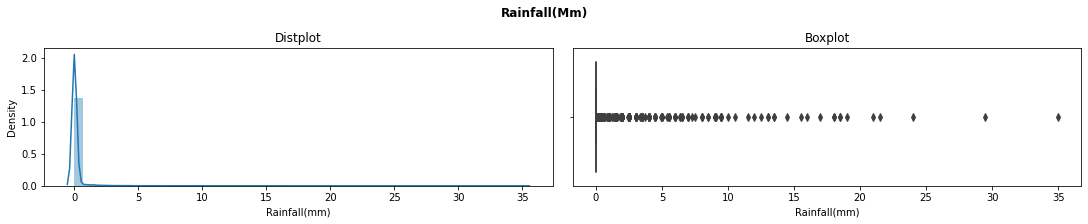

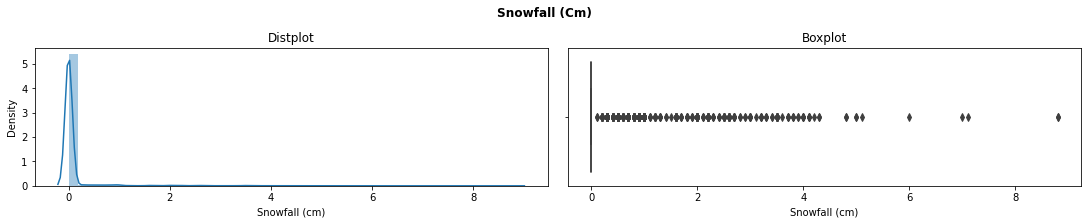

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
#Plotting Graphs Before treating outliers 
for col in df.describe().columns:
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
  sns.boxplot(df[col], ax=ax[1]).set(title="Boxplot")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

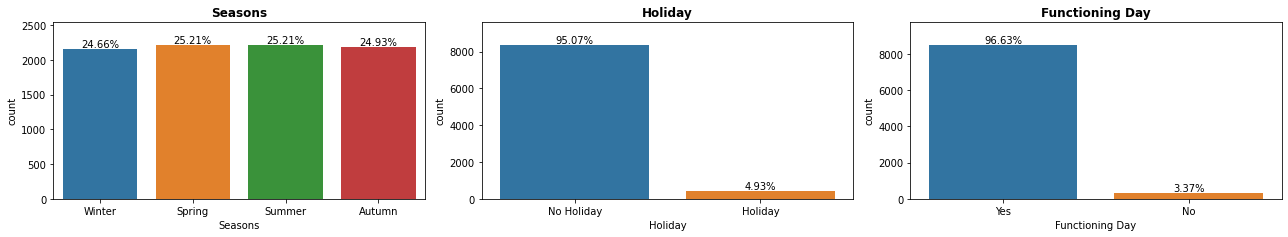

In [ ]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
  '''Takes axes as input and labels the percent count of each bar in a countplot'''
  for p in plot.patches:
    total = sum(p.get_height() for p in plot.patches)/100
    percent = round((p.get_height()/total),2)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')
    

# Defining r to autofit the number and size of plots
r = int(len(catagorical_columns)/3 +1)


# Plotting the countplots for each target variable
plt.figure(figsize=(18,r*3))
for n,column in enumerate(catagorical_columns):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(df[column]).margins(y=0.15)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
  annot_percent(plot)

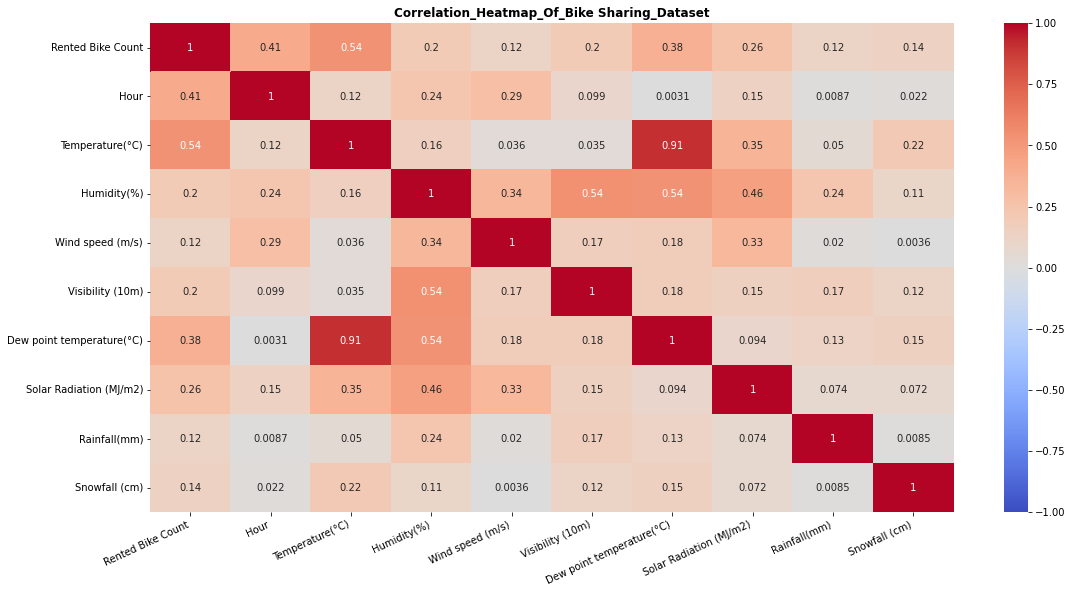

In [ ]:
# Correlation Analysis
plt.figure(figsize=(18,9))
plot = sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm',vmin=-1)
plt.title('Correlation_Heatmap_Of_Bike Sharing_Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.show()

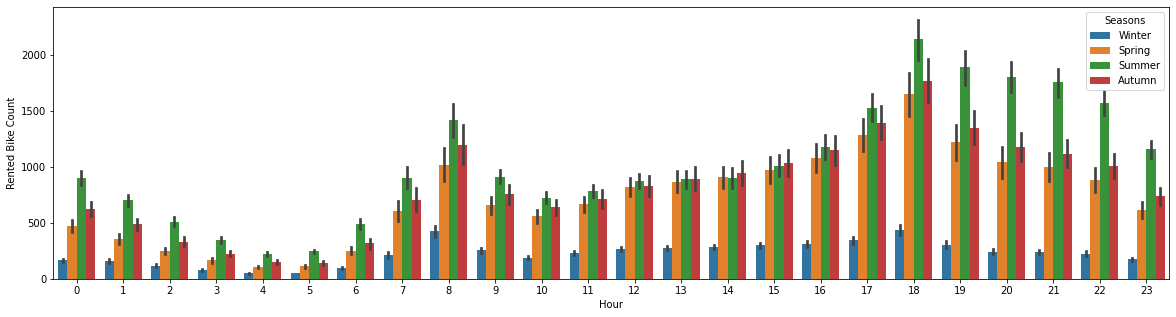

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Hour", y="Rented Bike Count", data=df,  hue = 'Seasons')

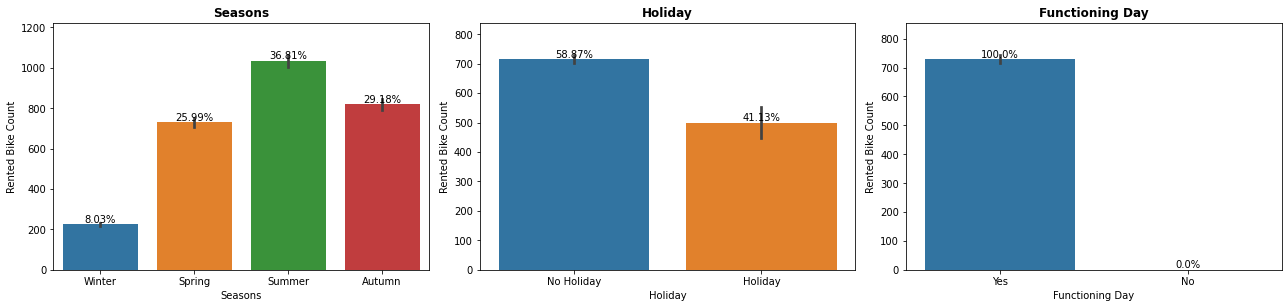

In [ ]:
plt.figure(figsize=(18,20))
for n,column in enumerate(catagorical_columns):
  plot = plt.subplot(5,3,n+1)
  sns.barplot(x=df[column], y="Rented Bike Count", data=df).margins(y=0.15)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
  annot_percent(plot)

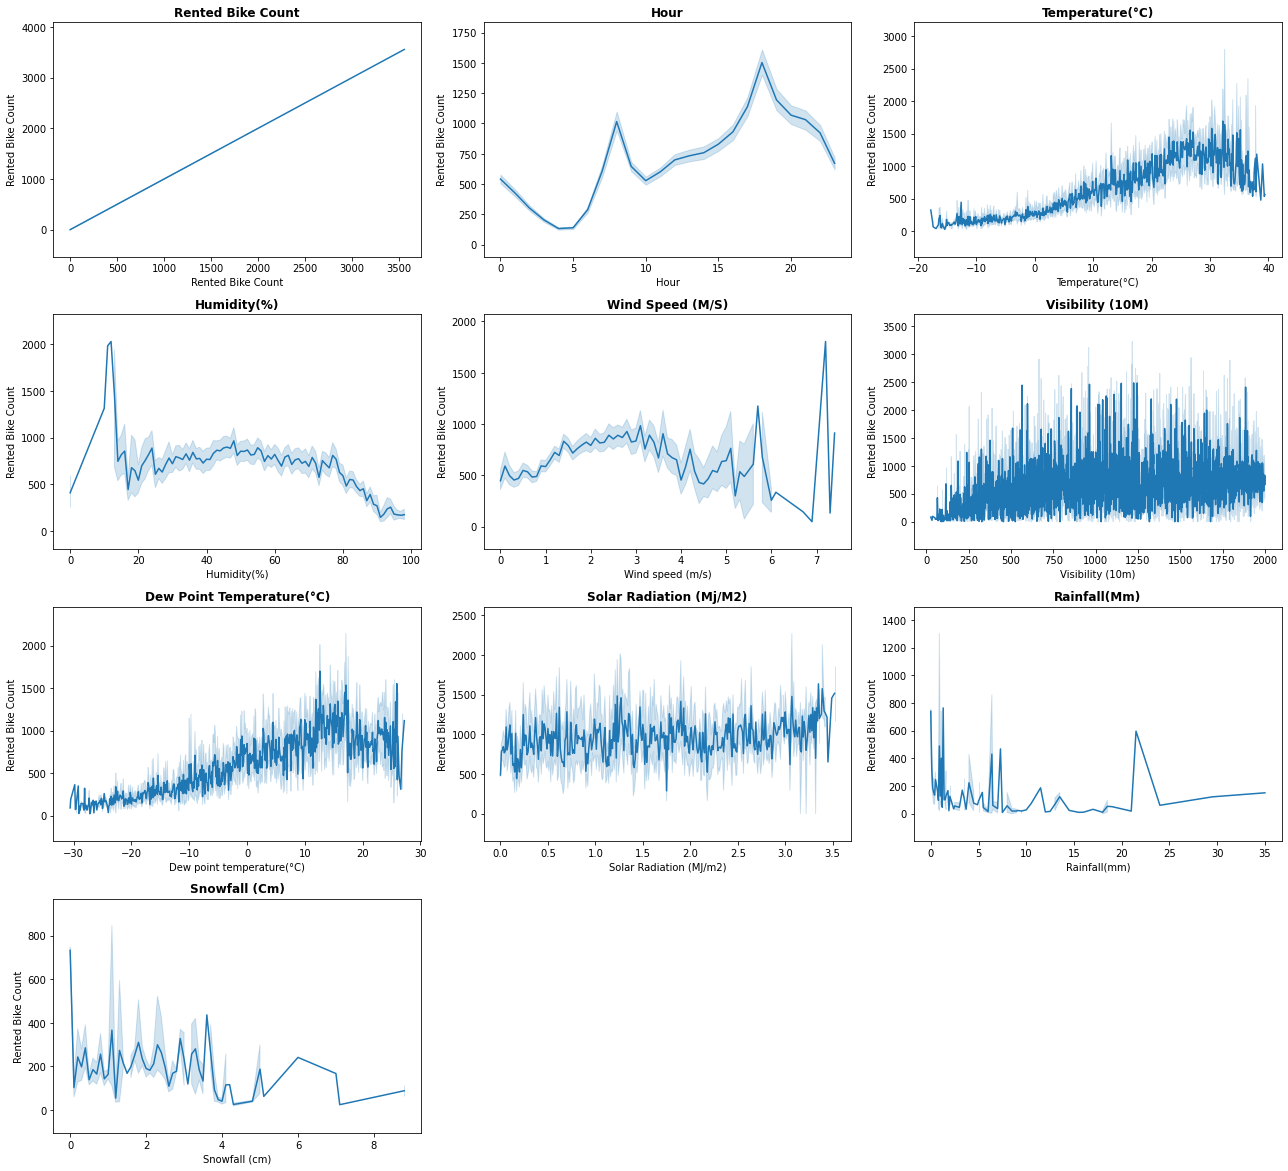

In [ ]:
plt.figure(figsize=(18,20))
for n,column in enumerate(numerical_columns):
  plot = plt.subplot(5,3,n+1)
  sns.lineplot(data=df, x=df[column], y="Rented Bike Count").margins(y=0.15)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout() 


LinAlgError: ignored

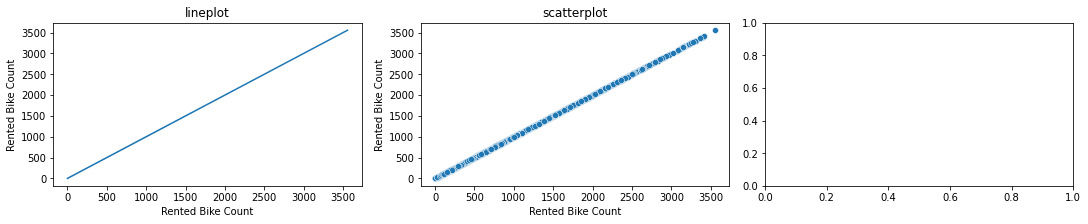

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
#Plotting Graphs Before treating outliers 
for col in numerical_columns:
  fig, ax =plt.subplots(1,3, constrained_layout=True)
  fig.set_size_inches(15, 3)

  sns.lineplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[0]).set(title="lineplot")
  sns.scatterplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[1]).set(title="scatterplot")
#   sns.jointplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[2]).set(title="jointplot")
#   sns.JointGrid(data=df, x=df[col], y="Rented Bike Count", ax=ax[2]).set(title="JointGrid")
  sns.kdeplot(data=df, x=df[col], y="Rented Bike Count", fill=True, ax=ax[2]) #.set(title="kdeplot")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show() 


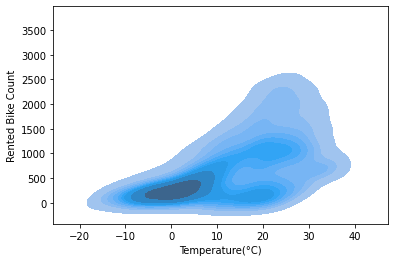

In [ ]:
sns.kdeplot(data=df, x='Temperature(°C)', y="Rented Bike Count", fill=True)

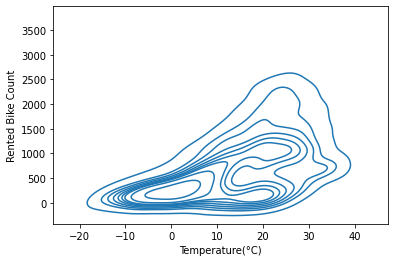

In [ ]:
sns.kdeplot(data=df, x='Temperature(°C)', y="Rented Bike Count")

LinAlgError: ignored

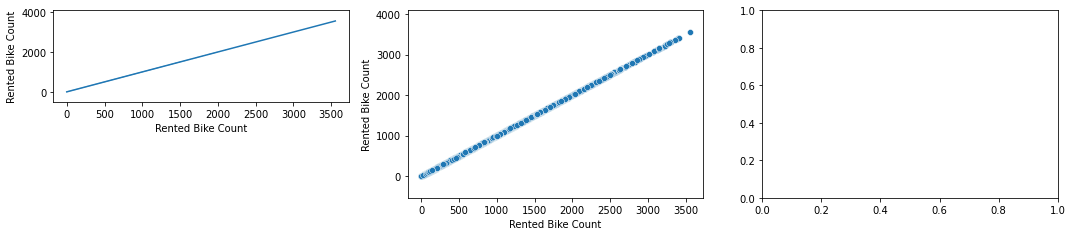

In [ ]:
plt.figure(figsize=(18,20))
for n,column in enumerate(numerical_columns):
  ax1 = plt.subplot(10,3,n+1)
  sns.lineplot(data=df, x=df[column], y="Rented Bike Count", ax = ax1).margins(y=0.15)
#   plt.title(f'{column.title()}',weight='bold')
#   plt.tight_layout()
  ax2 = plt.subplot(5,3,n+2)
  sns.scatterplot(data=df, x=df[column], y="Rented Bike Count", ax = ax2).margins(y=0.15)
  ax3 = plt.subplot(5,3,n+3)
  sns.kdeplot(data=df, x=df[column], y="Rented Bike Count", ax = ax3)


# # Visualization is the easiest way to have an inference about the overall data and the outliers.
# #Plotting Graphs Before treating outliers 
# for col in numerical_columns:
#   fig, ax =plt.subplots(1,3, constrained_layout=True)
#   fig.set_size_inches(15, 3)

#   sns.lineplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[0]).set(title="lineplot")
#   sns.scatterplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[1]).set(title="scatterplot")
# #   sns.jointplot(data=df, x=df[col], y="Rented Bike Count", ax=ax[2]).set(title="jointplot")
# #   sns.JointGrid(data=df, x=df[col], y="Rented Bike Count", ax=ax[2]).set(title="JointGrid")
#   sns.kdeplot(data=df, x=df[col], y="Rented Bike Count", fill=True, ax=ax[2]) #.set(title="kdeplot")
#   plt.suptitle(f'{col.title()}',weight='bold')
#   fig.show() 

plt.show()

LinAlgError: ignored

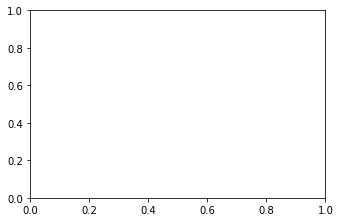

In [ ]:
plt.figure(figsize=(18,20))
for n,column in enumerate(numerical_columns):
  plot = plt.subplot(5,3,n+1)
#   sns.barplot(x=df[column], y="Rented Bike Count", data=df).margins(y=0.15)
  sns.kdeplot(data=df, x=df[column], y="Rented Bike Count")
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
#   annot_percent(plot)

LinAlgError: ignored

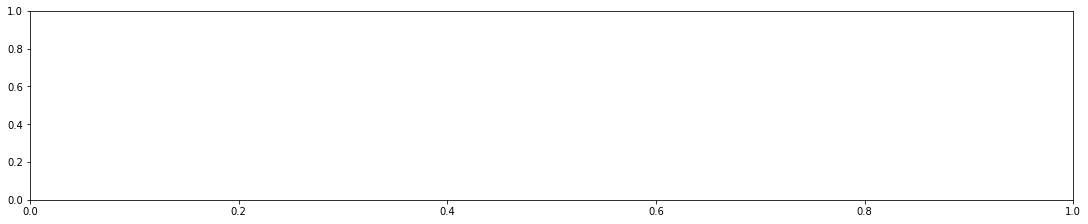

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
#Plotting Graphs Before treating outliers 
for col in numerical_columns[3:]:
  fig, ax =plt.subplots(1,1, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.kdeplot(data=df, x=df[column], y="Rented Bike Count")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

In [ ]:
numerical_columns[1:]

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

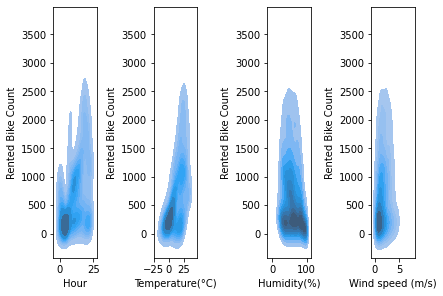

In [ ]:
fig, axs =plt.subplots(1,4, constrained_layout=True)

for j,i in enumerate(numerical_columns[1:5]):
    sns.kdeplot(data=df, x=i, y="Rented Bike Count", fill=True, ax = axs[j] )
plt.show()